### load in modules

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc


### load in shapefile

In [2]:
uk_map = gpd.read_file('./Data/shp/shapefile_out.shp')


### load in mergers file (for TL-A)

In [4]:
mergers = pd.read_csv('./BA.1.17_DTA_175_n11351_booster/mergers_rev.tsv', sep='\t')
mergers_dict = dict(zip(mergers.child_ltla.values, mergers.parent_ltla.values))


### load in processed booster uptake
with national average age structure

In [5]:
## epoch-1
epoch_1_booster_uptake = pd.read_csv('./epoch-1_avg_booster_uptake_7-days_lag.tsv', sep='\t')
epoch_1_booster_uptake


,ltla,booster_uptake_avg_age_proportion
0,E06000001,0.233429
1,E06000002,0.291215
2,E06000003,0.242564
3,E06000004,0.254288
4,E06000005,0.267886
...,...,...
248,E09000029,0.265709
249,E09000030,0.172388
250,E09000031,0.219518
251,E09000032,0.272847


In [6]:
## repopulate df with merged ltlas
epoch_1_booster_uptake_dict = dict(zip(epoch_1_booster_uptake.ltla.values,
                                       epoch_1_booster_uptake.booster_uptake_avg_age_proportion.values))
epoch_1_booster_uptake_merged_dat = []
for k, v in mergers_dict.items():
    epoch_1_booster_uptake_merged_dat.append((k, epoch_1_booster_uptake_dict[v]))
epoch_1_booster_uptake_merged_df = pd.DataFrame(epoch_1_booster_uptake_merged_dat,
                                                columns=['ltla', 'booster_uptake_avg_age_proportion'])

epoch_1_booster_uptake_concat = pd.concat([epoch_1_booster_uptake,
                                           epoch_1_booster_uptake_merged_df])
epoch_1_booster_uptake_concat


,ltla,booster_uptake_avg_age_proportion
0,E06000001,0.233429
1,E06000002,0.291215
2,E06000003,0.242564
3,E06000004,0.254288
4,E06000005,0.267886
...,...,...
55,E07000167,0.254272
56,E07000153,0.234527
57,E07000212,0.278990
58,E07000095,0.256999


In [7]:
## epoch-2
epoch_2_booster_uptake = pd.read_csv('./epoch-2_avg_booster_uptake_7-days_lag.tsv', sep='\t')
epoch_2_booster_uptake


,ltla,booster_uptake_avg_age_proportion
0,E06000001,0.466291
1,E06000002,0.486959
2,E06000003,0.477585
3,E06000004,0.503746
4,E06000005,0.512766
...,...,...
248,E09000029,0.503316
249,E09000030,0.375304
250,E09000031,0.404618
251,E09000032,0.511663


In [8]:
## repopulate df with merged ltlas
epoch_2_booster_uptake_dict = dict(zip(epoch_2_booster_uptake.ltla.values,
                                       epoch_2_booster_uptake.booster_uptake_avg_age_proportion.values))
epoch_2_booster_uptake_merged_dat = []
for k, v in mergers_dict.items():
    epoch_2_booster_uptake_merged_dat.append((k, epoch_2_booster_uptake_dict[v]))
epoch_2_booster_uptake_merged_df = pd.DataFrame(epoch_2_booster_uptake_merged_dat,
                                                columns=['ltla', 'booster_uptake_avg_age_proportion'])

epoch_2_booster_uptake_concat = pd.concat([epoch_2_booster_uptake,
                                           epoch_2_booster_uptake_merged_df])
epoch_2_booster_uptake_concat


,ltla,booster_uptake_avg_age_proportion
0,E06000001,0.466291
1,E06000002,0.486959
2,E06000003,0.477585
3,E06000004,0.503746
4,E06000005,0.512766
...,...,...
55,E07000167,0.546552
56,E07000153,0.488504
57,E07000212,0.549105
58,E07000095,0.427512


### create maps

In [9]:
norm=plt.Normalize(0.1, 0.7)
cmap = mc.LinearSegmentedColormap.from_list("", ['white', '#bf9a4e', '#3d2d0d'])


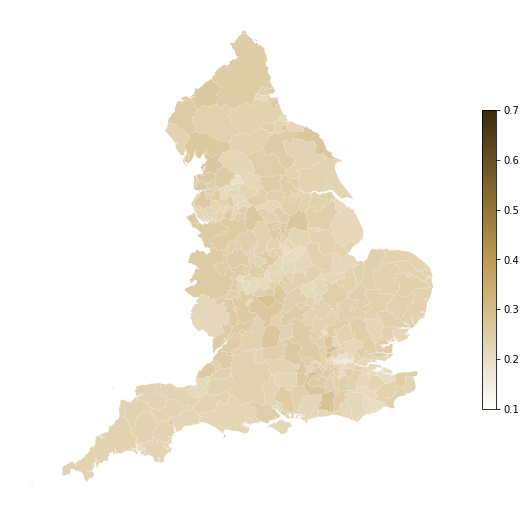

In [10]:
w = 10; h = 10
fig, ax = plt.subplots(figsize=(w, h))

epoch_1_map_dat = pd.merge(uk_map,
                           epoch_1_booster_uptake_concat, left_on='geo_code', right_on='ltla', how='outer')
epoch_1_plot = epoch_1_map_dat.plot(ax=ax, column='booster_uptake_avg_age_proportion',
                                    vmin=0.1,
                                    vmax=0.7,
                                    alpha=0.85, legend=True, legend_kwds={'shrink': 0.55},
                                    fc='.95', ec='#ffffff', lw=0.08, cmap=cmap,
                                    missing_kwds={'color': 'darkgrey', 'hatch': '///'})

epoch_1_plot.set_rasterized(True)
ax.set_axis_off()

plt.savefig('./epoch-1_booster_uptale_avg_age_proportions_ma.pdf', dpi=500, transparent=True)


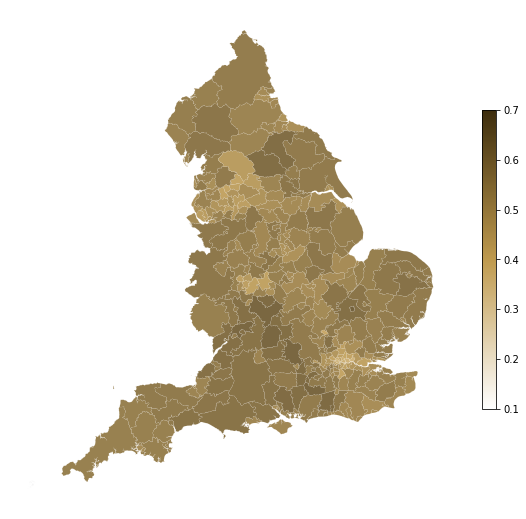

In [61]:
w = 10; h = 10
fig, ax = plt.subplots(figsize=(w, h))

epoch_2_map_dat = pd.merge(uk_map,
                           epoch_2_booster_uptake_concat, left_on='geo_code', right_on='ltla', how='outer')
epoch_2_plot = epoch_2_map_dat.plot(ax=ax, column='booster_uptake_avg_age_proportion',
                                    vmin=0.1,
                                    vmax=0.7,
                                    alpha=0.85, legend=True, legend_kwds={'shrink': 0.55},
                                    fc='.95', ec='#ffffff', lw=0.08, cmap=cmap,
                                    missing_kwds={'color': 'darkgrey', 'hatch': '///'})

epoch_2_plot.set_rasterized(True)
ax.set_axis_off()

plt.savefig('./epoch-2_booster_uptale_avg_age_proportions_map.pdf', dpi=500, transparent=True)
